In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.simplefilter("ignore")

In [2]:
sn.set_style('darkgrid')

In [34]:
df = pd.read_csv("Amazon Sale Report.csv")

In [35]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [36]:

df.drop(columns=['index'], axis=1, inplace=True)


In [37]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [38]:
df.shape

(128976, 20)

In [39]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [10]:
df.describe()

,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,0.904401,648.562176,463945.677744,NaN,NaN
std,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,110001.000000,NaN,NaN
25%,1.000000,449.000000,382421.000000,NaN,NaN
50%,1.000000,605.000000,500033.000000,NaN,NaN
75%,1.000000,788.000000,600024.000000,NaN,NaN
max,15.000000,5584.000000,989898.000000,NaN,NaN


In [12]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
Order ID,120229
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Category,9
Size,11
Courier Status,4
Qty,10


In [11]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [13]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Category,"[T-shirt, Shirt, Blazzer, Trousers, Perfume, S..."
Size,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, Free, 5XL]"
Courier Status,"[On the Way, Shipped, Cancelled, Unshipped]"
Qty,"[0, 1, 2, 15, 3, 9, 13, 5, 4, 8]"


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128976.0,0.904401,0.313368,0.0,1.0,1.0,1.0,15.0
Amount,121176.0,648.562176,281.185041,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128941.0,463945.677744,191458.488954,110001.0,382421.0,500033.0,600024.0,989898.0
New,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PendingS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


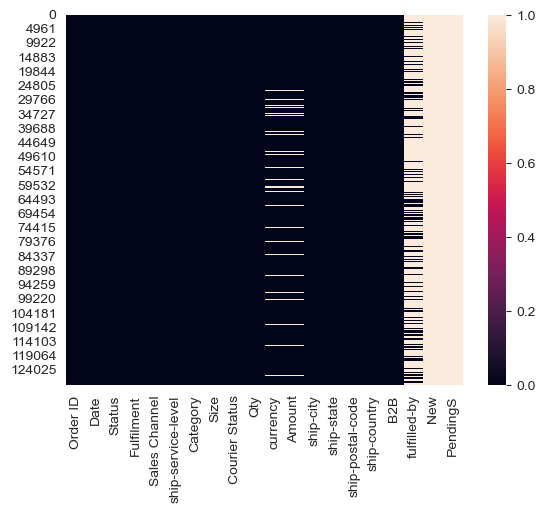

In [17]:
sn.heatmap(df.isnull())
plt.show()

In [27]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
B2B                        0
New                   128976
PendingS              128976
dtype: int64

# Data Cleaning

Dropping columns

In [106]:
df.columns


Index(['order_ID', 'date', 'ship_status', 'fullfilment', 'Sales Channel',
       'service_level', 'product_category', 'size', 'courier_ship_status',
       'order_quantity', 'order_amount_($)', 'city', 'state', 'zip',
       'customer_type', 'PendingS', 'month', 'date_numeric'],
      dtype='object')

In [42]:
df.drop(columns=['fulfilled-by', 'ship-country', 'currency'], inplace=True)

Dropping Duplicates

In [45]:
df[df.duplicated(['Order ID'], keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,New,PendingS
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,False,NaN,NaN
7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,399.0,HYDERABAD,TELANGANA,500032.0,False,NaN,NaN
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,False,NaN,NaN
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,363.0,Chennai,TAMIL NADU,600041.0,False,NaN,NaN
10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,685.0,CHENNAI,TAMIL NADU,600073.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128931,407-8519205-5064368,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,False,NaN,NaN
128942,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,XXL,Shipped,1,529.0,BENGALURU,KARNATAKA,560102.0,False,NaN,NaN
128943,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,XXL,Shipped,1,518.0,BENGALURU,KARNATAKA,560102.0,False,NaN,NaN
128953,404-8878574-4524358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,301.0,Rishra Hooghly,WEST BENGAL,712249.0,False,NaN,NaN


In [46]:
len(df)-len(df.drop_duplicates(['Order ID']))

8747

In [47]:
df.drop_duplicates(['Order ID'],inplace = True,ignore_index=True)

Filling NaN Values

In [48]:
df['Courier Status'].fillna('unknown',inplace=True)

In [51]:
df['PendingS'].fillna('no pending',inplace=True)

In [52]:
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.63%
Shipped                          2.18%
Shipping                         0.11%
Shipped - Delivered to Buyer     0.05%
Shipped - Returned to Seller     0.01%
Pending                          0.01%
Name: proportion, dtype: object

In [53]:
df['Amount'].fillna(0,inplace=True)

In [54]:
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)

In [55]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size',  'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}

In [56]:
df.rename(columns=mapper, inplace =True)

Convert Amount column values to $

In [57]:
exchange_rate = 0.0120988
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: x * exchange_rate)

Convert B2B column values

In [58]:
df['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

Creating Datetime and adding Month column

In [60]:
df['date'] = pd.to_datetime(df['date'])

In [62]:
march_dates = df['date'][df['date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [64]:
# dropping March dates from the dataset
df = df[(df['date'].dt.month != 3)]

In [65]:
df['month'] = df['date'].dt.month
df["month"].unique()

array([4, 5, 6])

In [66]:
month_map = { 4: 'april',5: 'may',6: 'june'}
df['month'] = df['date'].dt.month.map(month_map)

In [67]:
# Define the desired order of months
month_order = ['april', 'may', 'june']

# Convert the month column to a categorical data type with the desired order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [68]:
print(f'This dataset contains the months {df["month"].unique()} for 2022')
print(f'The earliest date is {df["date"].min()}')
print(f'The latest date is {df["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


Column Value Ordering

In [70]:
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

df['size'] = pd.Categorical(df['size'], categories=size_order, ordered=True)

# Data Visualizations

Checking The Clean Data

In [74]:
df['date'] = pd.to_datetime(df['date'])  
df['date_numeric'] = df['date'].astype('int64')  
df.describe(include='all') 


,order_ID,date,ship_status,fullfilment,Sales Channel,service_level,product_category,size,courier_ship_status,order_quantity,order_amount_($),city,state,zip,customer_type,New,PendingS,month,date_numeric
count,120071,120071,120071,120071,120071,120071,120071,120071,120071,120071.000000,120071.000000,120071,120071,120071.0,120071,0.0,120071,120071,1.200710e+05
unique,120071,NaN,13,2,2,2,9,11,4,NaN,NaN,8946,70,9455.0,2,NaN,1,3,NaN
top,405-8078784-5731545,NaN,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,customer,NaN,no pending,april,NaN
freq,1,NaN,72619,83771,119947,82692,47075,21039,101909,NaN,NaN,10426,20732,933.0,119277,NaN,120071,45709,NaN
mean,NaN,2022-05-12 13:11:21.107011328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903574,7.378675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.652361e+18
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.648771e+18
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.033101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.650413e+18
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.126193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.652141e+18
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.328175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.654301e+18
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,66.482906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.656461e+18


In [75]:
df.isnull().sum()

order_ID                    0
date                        0
ship_status                 0
fullfilment                 0
Sales Channel               0
service_level               0
product_category            0
size                        0
courier_ship_status         0
order_quantity              0
order_amount_($)            0
city                        0
state                       0
zip                         0
customer_type               0
New                    120071
PendingS                    0
month                       0
date_numeric                0
dtype: int64

In [76]:
df.drop(columns= ['New'], inplace=True)

In [77]:
df.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
Sales Channel          0
service_level          0
product_category       0
size                   0
courier_ship_status    0
order_quantity         0
order_amount_($)       0
city                   0
state                  0
zip                    0
customer_type          0
PendingS               0
month                  0
date_numeric           0
dtype: int64

In [78]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_ID,120071
date,90
ship_status,13
fullfilment,2
Sales Channel,2
service_level,2
product_category,9
size,11
courier_ship_status,4
order_quantity,9


In [79]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
service_level,"[Standard, Expedited]"
product_category,"[T-shirt, Shirt, Blazzer, Trousers, Perfume, S..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
courier_ship_status,"[On the Way, Shipped, Cancelled, Unshipped]"
order_quantity,"[0, 1, 2, 15, 3, 9, 13, 5, 4]"


In [100]:
# Calculate the IQR (Interquartile Range)
Q1 = df['order_amount_($)'].quantile(0.25)
Q3 = df['order_amount_($)'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['order_amount_($)'] >= lower_bound) & (df['order_amount_($)'] <= upper_bound)]

Median = df['order_amount_($)'].median()
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: Median if x > upper_bound  or x < lower_bound else x)

In [101]:
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: Median if x == 0 else x) 

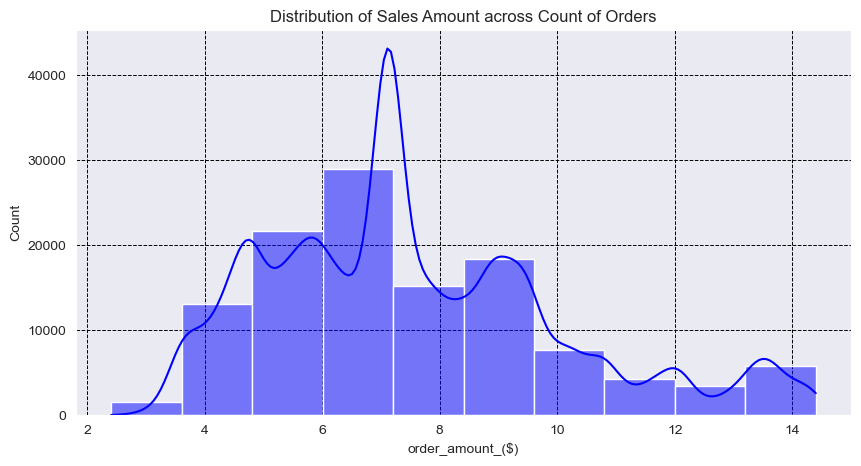

In [104]:
plt.figure(figsize=(10, 5))
sn.histplot(df['order_amount_($)'], kde=True, color='blue', bins=10)
plt.grid(linestyle='--',color='#000000')
plt.title('Distribution of Sales Amount across Count of Orders')
plt.xlabel('order_amount_($)')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='black')
plt.show()

In [107]:
Top5_Trending_product=df.groupby('product_category')['order_amount_($)'].sum().to_frame().sort_values(by=['order_amount_($)'],ascending=False).head(5)

In [109]:
Top5_Trending_product

,order_amount_($)
product_category,
T-shirt,428790.026336
Shirt,263308.380211
Blazzer,134008.836481
Trousers,65009.548134
Perfume,9282.956866


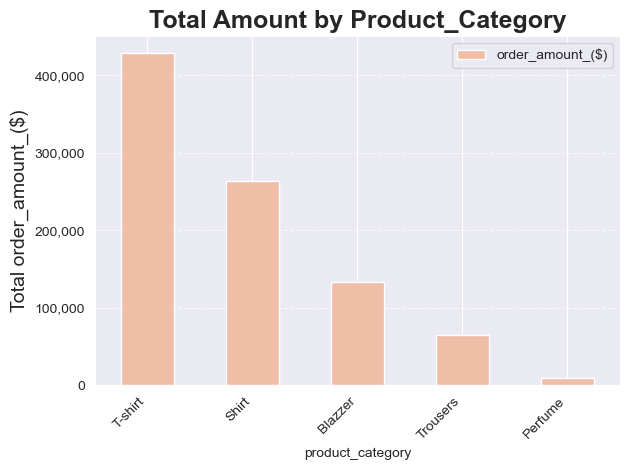

In [112]:
import matplotlib.ticker as mtick
Top5_Trending_product.plot(kind='bar',color='#f0bda7')
plt.title('Total Amount by Product_Category', fontsize=18, weight='bold')
plt.ylabel('Total order_amount_($)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
Top5_cities_orderfrom_Amazon=df.groupby('city')['order_amount_($)'].sum().to_frame().sort_values(by=['order_amount_($)'],ascending=False).head(5)
Top5_cities_orderfrom_Amazon

,order_amount_($)
city,
BENGALURU,78908.240755
HYDERABAD,55935.564524
MUMBAI,42071.766173
NEW DELHI,41991.755598
CHENNAI,35289.131344


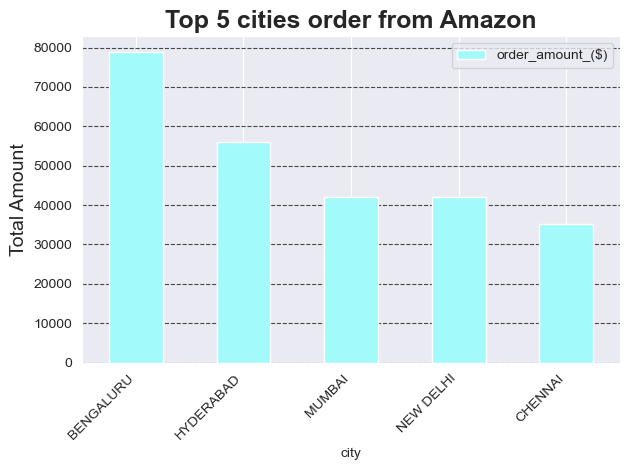

In [114]:
Top5_cities_orderfrom_Amazon.plot(kind='bar',color='#a3fafb')
plt.title('Top 5 cities order from Amazon', fontsize=18, weight='bold')
plt.ylabel('Total Amount', fontsize=14)
plt.grid(True, axis='y', linestyle='--',color='#000000', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [117]:
order_status=df.groupby('courier_ship_status').agg({'order_quantity': 'count', 'order_amount_($)': 'sum'}).sort_values(by='order_quantity', ascending = False)
order_status

,order_quantity,order_amount_($)
courier_ship_status,,
Shipped,101909,775947.996247
On the Way,6374,46415.206819
Unshipped,6178,47058.621366
Cancelled,5610,39977.943852


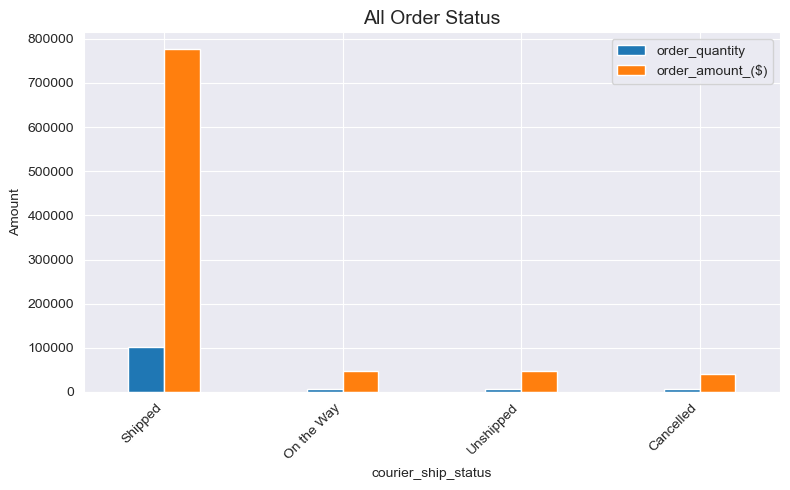

In [118]:
_, my_ax = plt.subplots(figsize=(8, 5))
order_status.plot(kind='bar', ax=my_ax, width=0.4)
plt.xticks(rotation=1, fontsize=10)
#plt.grid()
plt.title("All Order Status", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

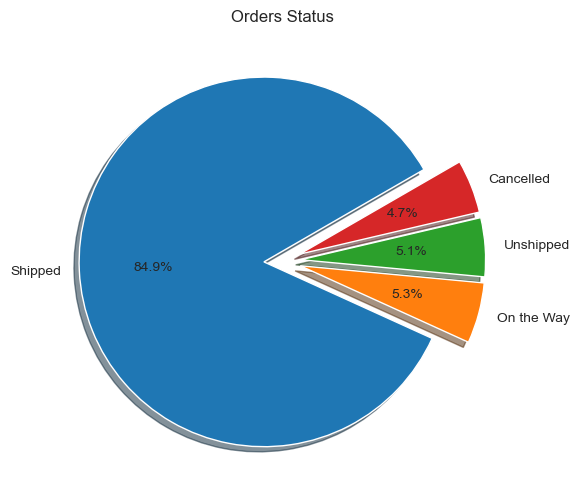

In [124]:
Status_count = df['courier_ship_status'].value_counts()


plt.figure(figsize=(6,6))
explode = (0.1,) * len(Status_count)
plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%', 
        startangle=30,explode=explode,shadow=True)

plt.title('Orders Status')
plt.show()

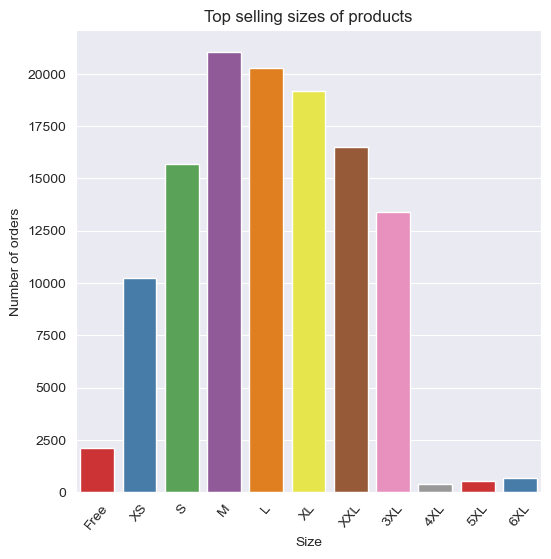

In [152]:
plt.figure(figsize=(6, 6))
sn.countplot(x=df['size'],data=df,palette='Set1') 
plt.xlabel('Size')
plt.ylabel('Number of orders')
plt.title('Top selling sizes of products')
plt.xticks(rotation=50)

plt.show()

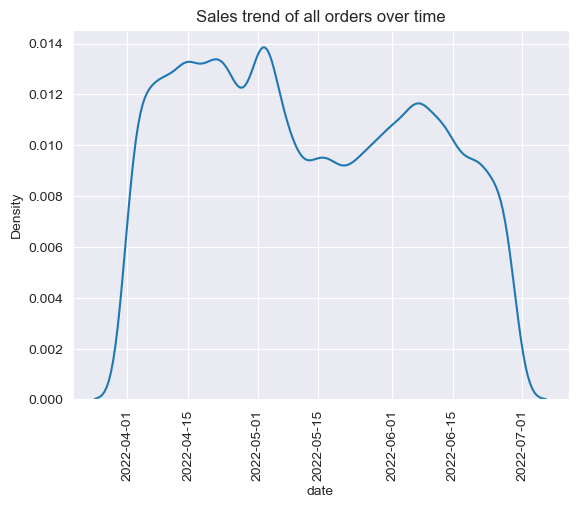

In [129]:
sn.kdeplot(data=df,x="date")
plt.xticks(rotation=90)
plt.title('Sales trend of all orders over time')
plt.show()

In [137]:
state_sales = df.groupby('state')['order_amount_($)'].sum().reset_index().sort_values(by='order_amount_($)', ascending=False).rename(columns={'order_amount_($)': 'Total Sales'})
state_sales.reset_index(drop=True)

,state,Total Sales
0,MAHARASHTRA,154663.224380
1,KARNATAKA,121736.048962
2,UTTAR PRADESH,79541.002551
3,TELANGANA,78541.880985
4,TAMIL NADU,74806.279090
...,...,...
65,Pondicherry,6.400265
66,rajsthan,6.303475
67,AR,5.964708
68,Rajsthan,5.359768


In [139]:
Top_10_states = state_sales.nlargest(10, 'Total Sales').reset_index(drop=True)
Top_10_states

,state,Total Sales
0,MAHARASHTRA,154663.224380
1,KARNATAKA,121736.048962
2,UTTAR PRADESH,79541.002551
3,TELANGANA,78541.880985
4,TAMIL NADU,74806.279090
5,DELHI,49141.855422
6,KERALA,44901.203276
7,WEST BENGAL,41822.061459
8,ANDHRA PRADESH,36569.860949
9,HARYANA,32763.700546


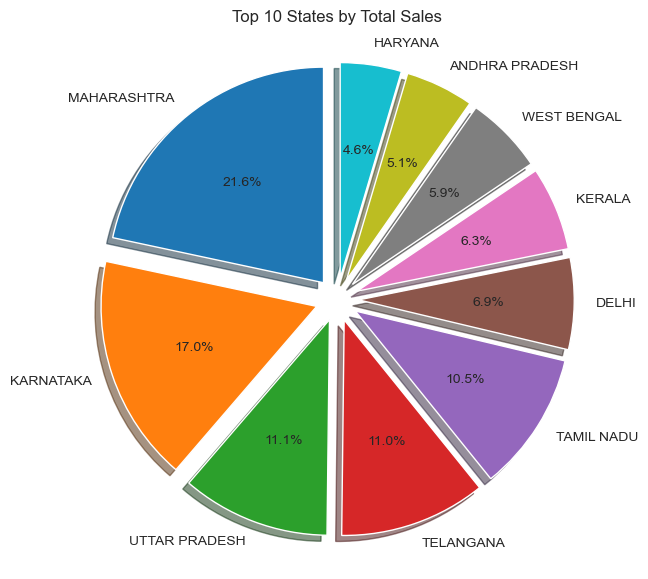

In [140]:
states = Top_10_states['state']
sales = Top_10_states['Total Sales']
plt.figure(figsize=(7, 7))
plt.pie(sales, labels=states, autopct='%1.1f%%', startangle=90, explode=[0.1]*len(states), shadow=True)
plt.title('Top 10 States by Total Sales')
plt.show()

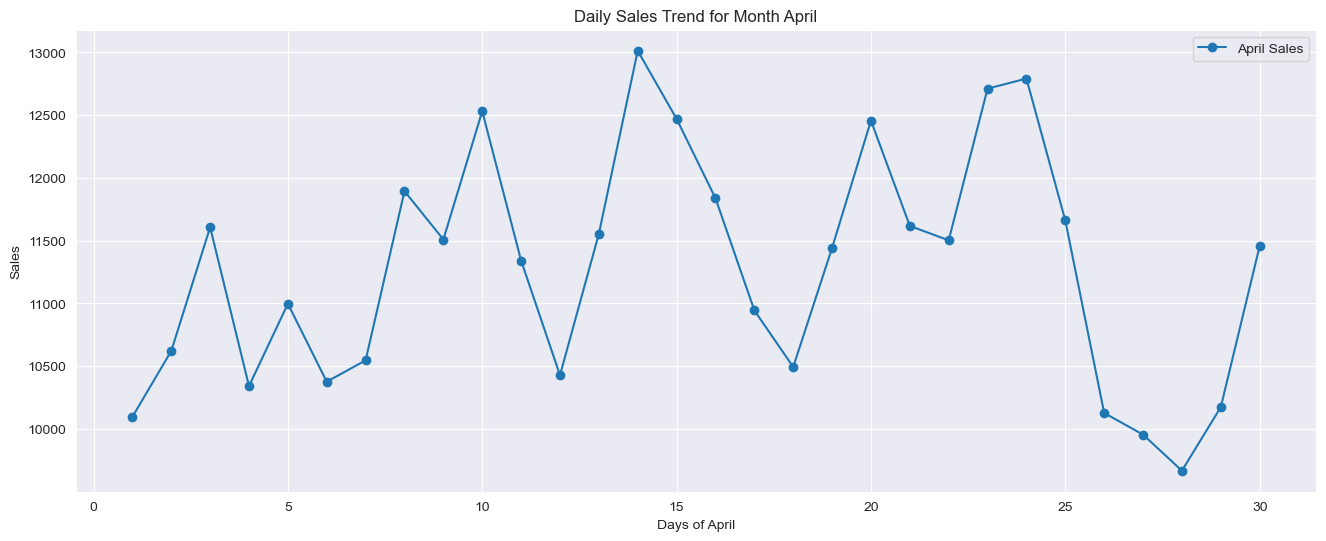

In [141]:
df[df['date'].dt.month == 4].groupby(df['date'].dt.day)['order_amount_($)'].sum().plot(marker='o', figsize=(16, 6))

plt.xlabel('Days of April')
plt.ylabel('Sales')
plt.title('Daily Sales Trend for Month April')
plt.legend(['April Sales'])
plt.show()

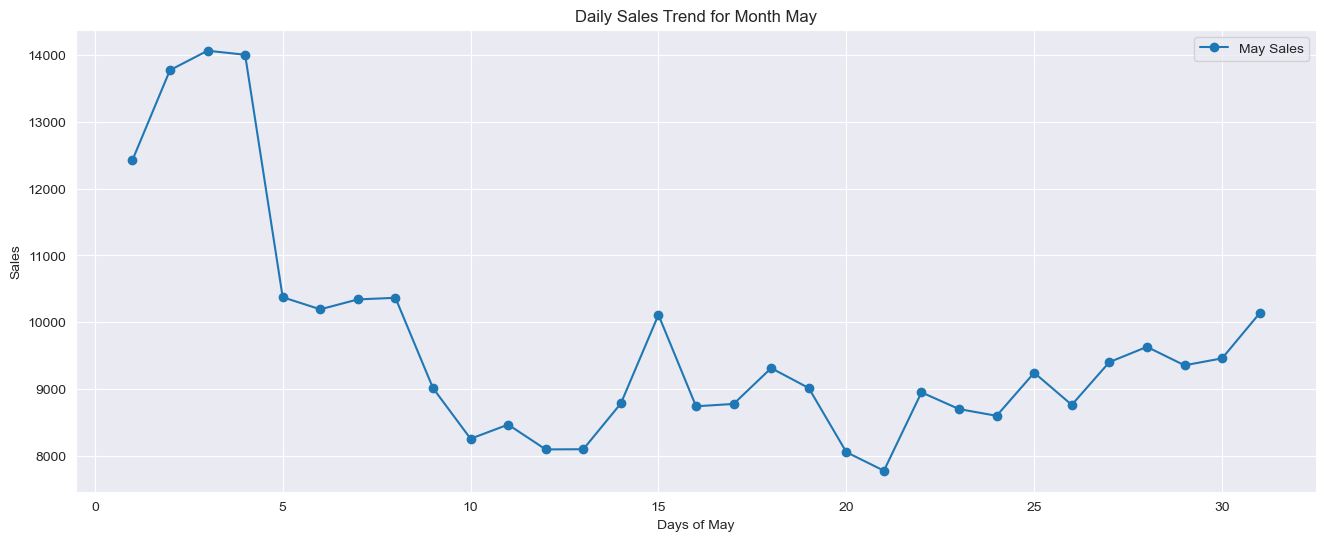

In [142]:
df[df['date'].dt.month == 5].groupby(df['date'].dt.day)['order_amount_($)'].sum().plot(marker='o', figsize=(16, 6))

plt.xlabel('Days of May')
plt.ylabel('Sales')
plt.title('Daily Sales Trend for Month May')
plt.legend(['May Sales'])
plt.show()

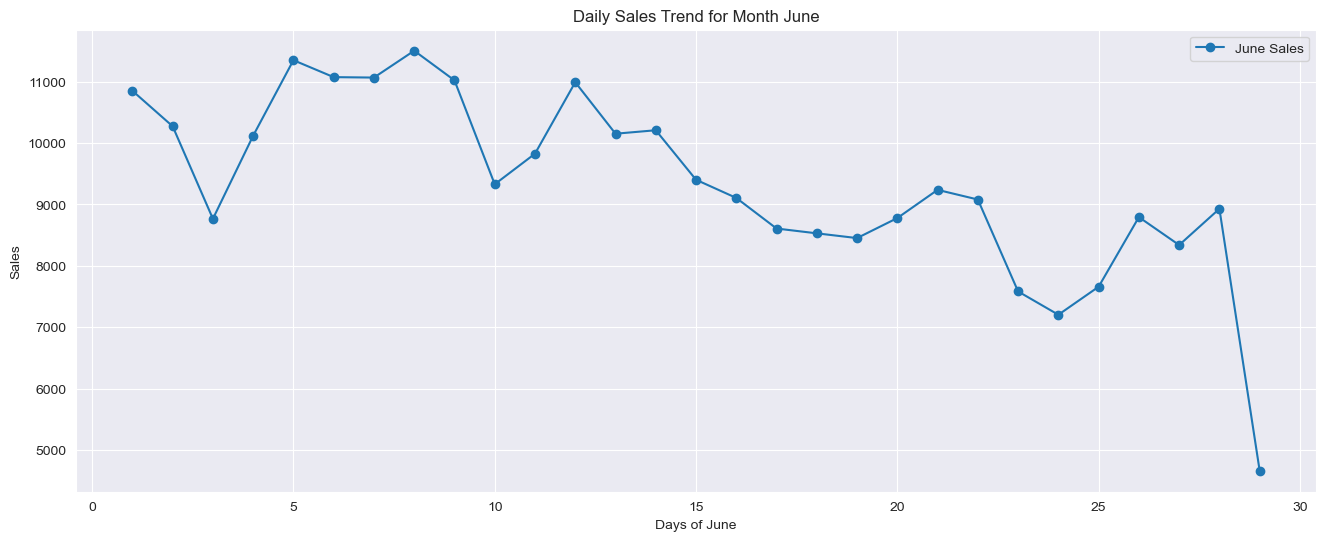

In [145]:
df[df['date'].dt.month == 6].groupby(df['date'].dt.day)['order_amount_($)'].sum().plot(marker='o', figsize=(16, 6))
plt.xlabel('Days of June')
plt.ylabel('Sales')
plt.title('Daily Sales Trend for Month June')
plt.legend(['June Sales'])
plt.show()

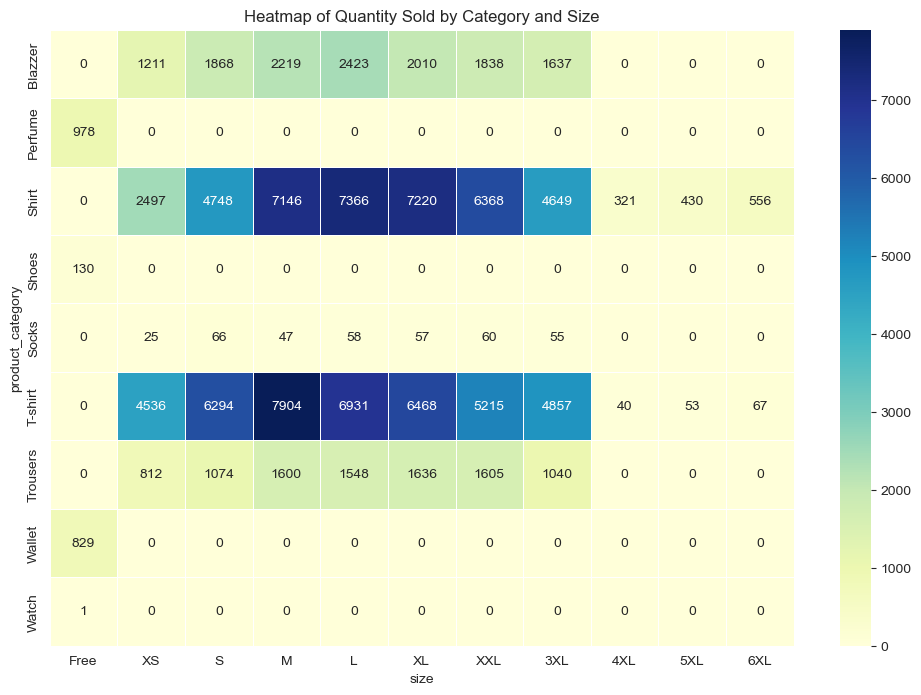

In [147]:
heatmap_data = df.pivot_table(index='product_category', columns='size', values='order_quantity', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Quantity Sold by Category and Size')
plt.show()